<a href="https://colab.research.google.com/github/robertomartinezedu/Curso-IA-BigData/blob/main/PIA/EntregaUd3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 AED

In [13]:
import kagglehub
import pandas as pd
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5


In [14]:
ls /root/.cache/kagglehub/datasets/shivamb/netflix-shows/versions/5

netflix_titles.csv


In [15]:
import os
csv_file_path = os.path.join(path,"netflix_titles.csv")
netflix_df = pd.read_csv(csv_file_path)

In [16]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 1.1 DEFINICIÓN DE COLUMNAS


1. **Show_id**: Un ID único para una película o serie. Cada película o serie en el conjunto de datos tiene asignado un número único.  
2. **Type**: El tipo de película o serie. Por ejemplo, contiene valores como "Movie" o "TV Show".  
3. **Title**: El título de la película o serie. Indica el nombre que se muestra al usuario.  
4. **Director**: El director de la película o serie. Contiene los nombres de la persona o personas que dirigieron la producción.  
5. **Cast**: Una lista de actores en la película o serie. Se enumeran los nombres de los actores que interpretan a los personajes principales.  
6. **Country**: El país o los países donde se realizó la película o serie. Indica el país en el que se rodó la producción.  
7. **Date_added**: La fecha en que se añadió a Netflix. Indica la fecha en la que la película o serie se incorporó a la plataforma.  
8. **Release_year**: El año en que se estrenó la película o serie. Indica el año en que la producción llegó por primera vez a su audiencia.  
9. **Rating**: La clasificación de la película o serie según la audiencia. A menudo se evalúa junto con la clasificación por edades (por ejemplo, PG-13, R).  
10. **Duration**: La duración de la película o serie. Indica el tiempo total de ejecución en minutos para una película o el tiempo total de temporadas para una serie.  
11. **Listed_in**: Las categorías en las que se clasifica la película o serie. Por ejemplo, incluye géneros como "Action", "Drama", "Comedy".  
12. **Description**: Una breve descripción de la película o serie. Proporciona a los espectadores información sobre la trama de la producción.  

Se va a realizar una observación preliminar de la distribución de los datos nulos.

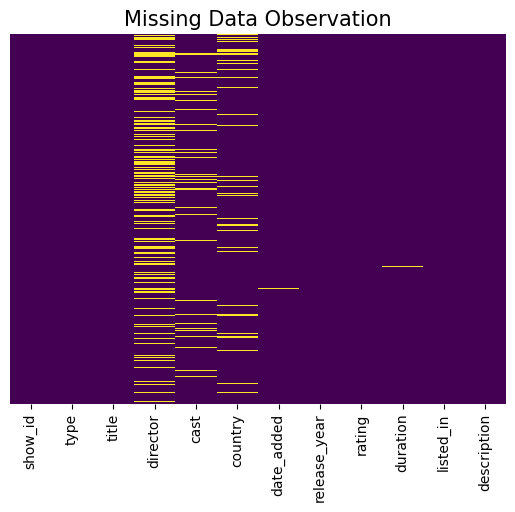

In [19]:
import matplotlib.pyplot as plt
sns.heatmap(netflix_df.isnull(),yticklabels=False,cbar=False,cmap='viridis');
plt.title("Missing Data Observation", fontsize = 15)
plt.show()

Como se puede observar faltan una gran cantidad de directores, actores y países.

In [5]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
typeNum = netflix_df['type'].nunique()
directorNum = netflix_df['country'].nunique()
ratingNum = netflix_df['rating'].nunique()
release_yearNum = netflix_df['release_year'].nunique()
print(f"type: {typeNum}")
print(f"director: {directorNum}")
print(f"rating: {ratingNum}")
print(f"release_year: {release_yearNum}")

type: 2
director: 748
rating: 17
release_year: 74


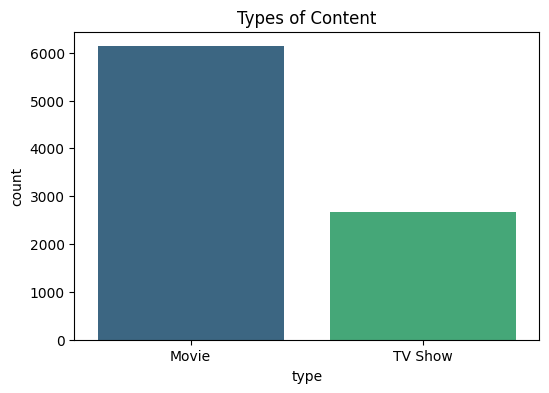

In [28]:
type_value = netflix_df['type'].value_counts()
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=netflix_df, x='type', hue='type', palette='viridis', ax=ax)
ax.set_title('Types of Content')
plt.show()

In [ ]:
rating_value = netflix_df['rating'].value_counts()
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=netflix_df, x='rating', hue='rating', palette='viridis', ax=ax)
ax.set_title('Ratings')
plt.show()